<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 8.2: Boosting

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find an answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.9429
    - **ROC AUC**  = 0.9333
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to identify the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ than **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, laborious, iterative and interactive process. It is part of the process to repeat, review and change when finding a dead-end.

## Scenario: Predicting Breast Cancer
The dataset you are going to be using for this laboratory is popularly known as the **Wisconsin Breast Cancer** dataset. The task related to it is Classification.

The dataset contains a total number of _10_ features labelled in either **benign** or **malignant** classes. The features have _699_ instances out of which _16_ feature values are missing. The dataset only contains numeric values.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

# Step 2: Find the Data
### Wisconsin Breast Cancer DataSet
- **Citation Request**

    This breast cancer databases was obtained from the **University of Wisconsin Hospitals**, **Madison** from **Dr. William H. Wolberg**. If you publish results when using this database, then please include this information in your acknowledgements.

- **Title**

    Wisconsin Breast Cancer Database (January 8, 1991)

- **Sources**
    - **Creator**
            Dr. William H. Wolberg (physician)
            University of Wisconsin Hospitals
            Madison, Wisconsin
            USA
    - **Donor**
            Olvi Mangasarian (mangasarian@cs.wisc.edu)
            Received by David W. Aha (aha@cs.jhu.edu)
    - **Date**
            15 July 1992
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [99]:
# Import libraries

import re

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [100]:
df = pd.read_csv('breast_cancer_wisconsin_data.csv')

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [102]:
df.shape

(569, 33)

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

In [103]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [104]:
# Convert the objects in column 'diagnosis' into binary values 

df['diagnosis'] = df['diagnosis'].map( {'B': 0, 'M': 1} ).astype(int)

In [105]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [106]:
# Cleaning columns that are not properly labelled

df.columns = df.columns.map(lambda x: x.replace(' ','_'))

In [107]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed:_32'],
      dtype='object')

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

In [108]:
correlations = df.corr()
pd.DataFrame(correlations['diagnosis']).sort_values(by='diagnosis', ascending=False)

,diagnosis
diagnosis,1.000000
concave_points_worst,0.793566
perimeter_worst,0.782914
concave_points_mean,0.776614
radius_worst,0.776454
perimeter_mean,0.742636
area_worst,0.733825
radius_mean,0.730029
area_mean,0.708984
concavity_mean,0.696360


In [109]:
# Drop unnecessary columns for machine learning

df.drop(['id', 'Unnamed:_32'], axis=1, inplace=True)

In [110]:
# Define X and y

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [111]:
# boosting = AdaBoostClassifier

# Building the model
boost_ada = AdaBoostClassifier()
  
# Training the model
boost_ada.fit(X, y)
  
# Computing the importance of each feature
feature_importance = boost_ada.feature_importances_

feature_importance

array([0.  , 0.1 , 0.  , 0.  , 0.04, 0.06, 0.02, 0.08, 0.  , 0.  , 0.02,
       0.02, 0.  , 0.1 , 0.  , 0.04, 0.  , 0.  , 0.04, 0.06, 0.02, 0.06,
       0.02, 0.08, 0.06, 0.02, 0.06, 0.06, 0.02, 0.02])

In [112]:
# Concatenate columns in X with feature importance

total = []
for imp, fea in zip(feature_importance, X.columns):
    cast = {'features': fea, 'importance': imp}
    total.append(cast)
feature_importance_df = pd.DataFrame(data=total, columns=['features', 'importance'])
feature_importance_df

,features,importance
0,radius_mean,0.00
1,texture_mean,0.10
2,perimeter_mean,0.00
3,area_mean,0.00
4,smoothness_mean,0.04
5,compactness_mean,0.06
6,concavity_mean,0.02
7,concave_points_mean,0.08
8,symmetry_mean,0.00
9,fractal_dimension_mean,0.00


In [113]:
# Sort the weight of each feature

feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)
feature_importance_df

,features,importance
1,texture_mean,0.10
13,area_se,0.10
23,area_worst,0.08
7,concave_points_mean,0.08
19,fractal_dimension_se,0.06
27,concave_points_worst,0.06
5,compactness_mean,0.06
26,concavity_worst,0.06
21,texture_worst,0.06
24,smoothness_worst,0.06


# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [114]:
# Select the best 10 features

X_feature_eng = df[['texture_mean', 'area_se', 'concave_points_mean', 'fractal_dimension_se', 'compactness_mean',\
                    'concavity_worst', 'smoothness_worst', 'perimeter_worst', 'radius_worst', 'symmetry_worst',\
                   ]]

In [115]:
# Split the dataset 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_feature_eng, y, test_size=0.3, random_state=1)

In [116]:
# Training the model

boost_ada.fit(X_train, y_train)

AdaBoostClassifier()

In [117]:
pred_ada =  boost_ada.predict(X_train)

In [118]:
from sklearn import metrics
from sklearn.metrics import classification_report

print(classification_report(y_train, pred_ada))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       1.00      1.00      1.00       149

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398



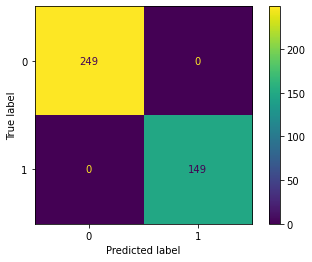

In [119]:
# Confusion matrix for training set

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(boost_ada, X_train, y_train)  
plt.show()  

In [120]:
# Generate the prediction values using predict_proba() function 
pred_proba_ada = boost_ada.predict_proba(X_train)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_train, pred_proba_ada)

# Store the Area Under the Curve (AUC) 
roc_auc = metrics.auc(fpr, tpr)

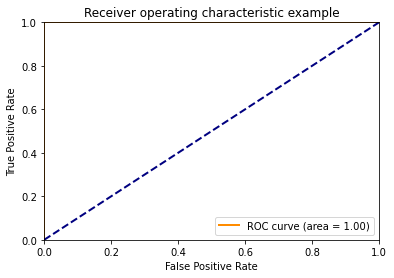

In [121]:
# Plot Roc Auc curve for the training set

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

In [122]:
# Classification Report for test set

pred_ada_test =  boost_ada.predict(X_test)
print(classification_report(y_test, pred_ada_test))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       108
           1       0.89      0.94      0.91        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171



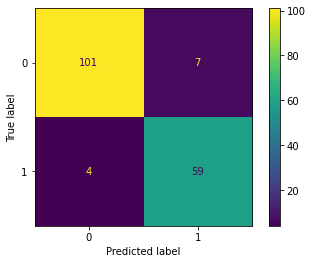

In [123]:
# Plot Confusion matrix for test set

plot_confusion_matrix(boost_ada, X_test, y_test)  
plt.show()  

In [124]:
# Generate the prediction values using predict_proba() function 
pred_proba_ada_test = boost_ada.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, pred_proba_ada_test)

# Store the Area Under the Curve (AUC)
roc_auc = metrics.auc(fpr, tpr)

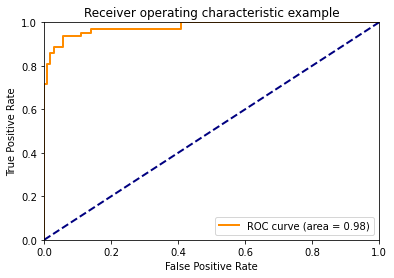

In [125]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

# Step 8: Define and Fit Models

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [126]:
# Boosting with gradient boosting classifier

from sklearn.ensemble import GradientBoostingClassifier

grad_boost = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)

# Step 9: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [127]:
# Predict training set

pred_grad =  grad_boost.predict(X_train)

# Classification report for training set

print(classification_report(y_train, pred_grad))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       1.00      1.00      1.00       149

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398



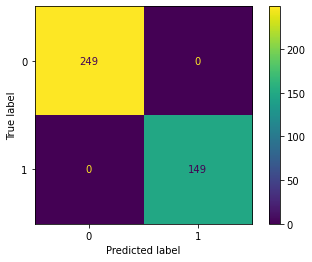

In [128]:
# Confusion Matrix for train set

plot_confusion_matrix(grad_boost, X_train, y_train)  
plt.show()  

In [129]:
# Generate the prediction values using predict_proba() function 
pred_proba_grad = grad_boost.predict_proba(X_train)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_train, pred_proba_grad)

# Store the Area Under the Curve (AUC)
roc_auc = metrics.auc(fpr, tpr)

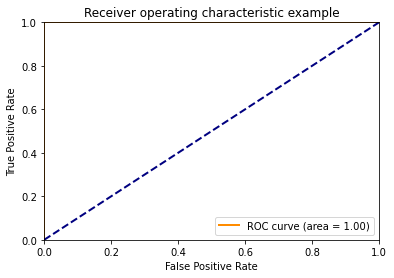

In [130]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

# Step 10: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [131]:
# Predict test set

pred_grad_test =  grad_boost.predict(X_test)

# Classification report for test set

print(classification_report(y_test, pred_grad_test))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



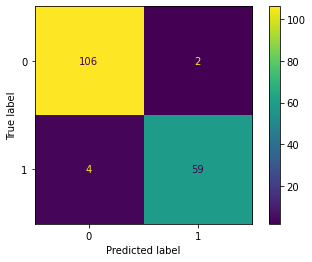

In [132]:
plot_confusion_matrix(grad_boost, X_test, y_test)  
plt.show()  

In [133]:
# Generate the prediction values using predict_proba() function 
pred_proba_grad_test = grad_boost.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, pred_proba_grad_test)

# Store the Area Under the Curve (AUC) 
roc_auc = metrics.auc(fpr, tpr)

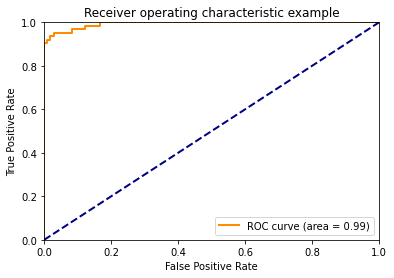

In [134]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

# Step 11: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



